In [ ]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
import numpy as np
from tensorflow.keras.optimizers import RMSprop

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

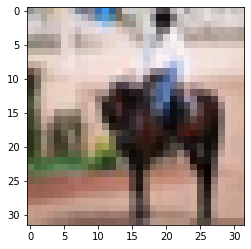

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[11])

In [ ]:
print(x_train[11])

[[[142 149 152]
  [172 172 167]
  [176 168 154]
  ...
  [216 212 211]
  [198 194 193]
  [205 202 200]]

 [[191 190 192]
  [196 192 190]
  [174 166 159]
  ...
  [229 222 220]
  [222 215 213]
  [217 210 207]]

 [[220 212 212]
  [217 209 208]
  [192 183 182]
  ...
  [224 214 209]
  [225 214 210]
  [218 208 203]]

 ...

 [[197 152 136]
  [196 152 135]
  [201 156 140]
  ...
  [200 165 146]
  [199 165 146]
  [205 164 150]]

 [[196 157 139]
  [191 152 135]
  [193 154 136]
  ...
  [198 164 144]
  [199 165 145]
  [201 161 146]]

 [[186 150 133]
  [182 147 130]
  [174 139 121]
  ...
  [158 124 105]
  [158 125 106]
  [163 125 111]]]


In [ ]:
print(y_train[11])

[7]


In [ ]:
num_classes = 10

print('Before:',y_test[0])

y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

print('After:',y_test[0])

x_train = x_train/255.0
x_test = x_test/255.0

# print(y_train[11])

Before: [3]
After: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['acc'])

In [ ]:
model.fit(x_train, y_train, epochs=30)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 298us/sample - loss: 0.5614 - acc: 0.8917
Epoch 2/30
50000/50000 [==============================] - 13s 263us/sample - loss: 0.2608 - acc: 0.9045
Epoch 3/30
50000/50000 [==============================] - 13s 261us/sample - loss: 0.2526 - acc: 0.9064
Epoch 4/30
50000/50000 [==============================] - 13s 261us/sample - loss: 0.2480 - acc: 0.9075
Epoch 5/30
50000/50000 [==============================] - 13s 260us/sample - loss: 0.2461 - acc: 0.9081
Epoch 6/30
50000/50000 [==============================] - 13s 262us/sample - loss: 0.2444 - acc: 0.9087
Epoch 7/30
50000/50000 [==============================] - 13s 261us/sample - loss: 0.2425 - acc: 0.9088
Epoch 8/30
50000/50000 [==============================] - 13s 262us/sample

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


In [ ]:
!pwd

/content


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/'+fn
  img = image.load_img(path, target_size=(32,32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)

classes2 = np.argmax(classes, axis=1)


if classes2[0] == 0:
  print('Airplane')
elif classes2[0] == 1:
  print('Automobile')
elif classes2[0] == 2:
  print('Bird')
elif classes2[0] == 3:
  print('Cat')
elif classes2[0] == 4:
  print('Deer')
elif classes2[0] == 5:
  print('Dog')
elif classes2[0] == 6:
  print('Frog')
elif classes2[0] == 7:
  print('Horse')
elif classes2[0] == 8:
  print('Sheep')
elif classes2[0] == 9:
  print('Truck')
else:
  print("Can't be Recognized!!!")

print("Done!!")

Saving Airplane.jpg to Airplane.jpg


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (91850210 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Sheep
Done!!
